Sebastian Raschka   
last updated: 05/07/2014  

- [Link to this IPython Notebook on GitHub](https://github.com/rasbt/pattern_classification/blob/master/stat_pattern_class/supervised/parametric/parameter_estimation/max_likelihood_est_distributions.ipynb)   
- [Link to the GitHub repository](https://github.com/rasbt/pattern_classification)

<hr>
I am really looking forward to your comments and suggestions to improve and extend this tutorial! Just send me a quick note   
via Twitter: [&#64;rasbt](https://twitter.com/rasbt)  
or Email: [bluewoodtree@gmail.com](mailto:bluewoodtree@gmail.com)
<hr>

# How to compute Maximum Likelihood Estimates (MLE) for different distributions



<a name ='sections'></a>
<br>
<br>


#Sections

- [Introduction](#introduction)
- [General Concept](#general_concept)
- [Multivariate Gaussian Distribution](#multi_gauss)
- [Univariate Rayleigh Distribution](#uni_rayleigh)
- [Univariate Poisson Distribution](#uni_poisson)



<br>
<br>
<a name='introduction'></a>


# Introduction

The Maximum Likelihood Estimation (MLE) is a technique that uses the training data to estimate parameter values for a particular distribution. A popular example would be to estimate the mean and variance of a Normal distribution by computing it from the training data.

MLE can be used on pattern classification tasks under the condition that the model of the distributions (and the number of parameters that we want to estimate) is known.

An introduction about how to use the Maximum Likelihood Estimate for pattern classification task can be found in an [earlier article](http://nbviewer.ipython.org/github/rasbt/pattern_classification/blob/master/parameter_estimation_techniques/maximum_likelihood_estimate.ipynb?create=1)

**To summarize the problem:** Using MLE, we want to estimate the values of the parameters for a given distribution. For example, in a pattern classification task with a Bayes classifier and normal distributed class-conditional densities, those parameters would be the *mean* and *variance* (  $p(\pmb x \; | \; \omega_i) \sim N(\pmb\mu, \pmb\sigma^2)$ ). 


<a name='general_concept'></a>
<br>
<br>


#General Concept

For the Maximum Likelihood Estimate (MLE), we assume that we have a data set of *i.i.d.* (independent and identically distributed) samples    
$D = \left\{ \pmb x_1, \pmb x_2,..., \pmb x_n \right\} $.

<br>
<br>


### Likelihood

The probability of observing the data set $D = \left\{ \pmb x_1, \pmb x_2,..., \pmb x_n \right\} $ can be pictured as probability to observe a particular sequence of patterns,  
where the probability of observing a particular patterns depends on $\pmb \theta$, the parameters the underlying (class-conditional) distribution. In order to apply MLE, we have to make the assumption that the samples are *i.i.d.* (independent and identically distributed).
<br>
<br>
$p(D\; | \;  \pmb \theta\;) \\
= p(\pmb x_1 \; | \; \pmb \theta\;)\; \cdot \; p(\pmb x_2 \; | \;\pmb \theta\;) \; \cdot \;...  \; p(\pmb x_n \; | \; \pmb \theta\;) \\ 
= \prod_{k=1}^{n} \; p(\pmb x_k \pmb \; | \; \pmb \theta \;)$  
<br>
Where $\pmb\theta$ is the parameter vector, that contains the parameters for a particular distribution that we want to estimate.

and $p(D\; | \;  \pmb  \theta\;)$ is also called the ***likelihood of $\pmb\ \theta$***.

For convenience, we take the natural logarithm in order to compute the so-called ***log-likelihood***:  



$p(D|\theta) = \prod_{k=1}^{n} p(x_k|\theta) \\
\Rightarrow l(\theta) = \sum_{k=1}^{n} ln \; p(x_k|\theta)$    

### Goal:
Compute $\hat{\pmb \theta}$, which are the values that maximize $p(D\; | \;  \pmb \theta\;)$.

In pattern classification tasks we have multiple classes $\omega_j$ with independent class-conditional densities $p(\pmb x | \omega_j)$, which are dependent on the parameters of the distribution $p(\pmb x | \omega_j, \pmb \theta_j)$

### Approach:

In order to maximize $p(D\; | \;  \pmb \theta\;)$, we can apply the rules of differential calculus for every parameters to the ***log-likelihoods***:

$\nabla_{\pmb \theta} \equiv \begin{bmatrix}  
\frac{\partial \; }{\partial \; \theta_1} \\
\frac{\partial \; }{\partial \; \theta_2} \\
...\\
\frac{\partial \; }{\partial \; \theta_p}\end{bmatrix}$

Which as to be done for every class $\omega_j$ separately, and for our convenience, let us drop the class labels *j* for now, so that for a class $\omega_j$:

$\nabla_{\pmb \theta} l(\pmb\theta) \equiv \begin{bmatrix}  
\frac{\partial \; L(\pmb\theta)}{\partial \; \theta_1} \\
\frac{\partial \; L(\pmb\theta)}{\partial \; \theta_2} \\
...\\
\frac{\partial \; L(\pmb\theta)}{\partial \; \theta_p}\end{bmatrix}$
$= \begin{bmatrix}  
0 \\
0 \\
...\\
0\end{bmatrix}$

<a name='multi_gauss'></a>
<br>
<br>


# Multivariate Gaussian Distribution

#### Probability Density Function:



$p(\pmb x) \sim N(\pmb \mu|\Sigma)$

$p(\pmb x) \sim \frac{1}{(2\pi)^{d/2} \; |\Sigma|^{1/2}} exp \bigg[ -\frac{1}{2}(\pmb x - \pmb \mu)^t \Sigma^{-1}(\pmb x - \pmb \mu) \bigg]$


<hr>

**likelihood of $\pmb\ \theta$:**  

$\Rightarrow p(D\; | \;  \pmb \theta\;) = \prod_{k=1}^{n} \; p(\pmb x_k \pmb \; | \; \pmb \theta \;)\\
\Rightarrow p(D\; | \;  \pmb \theta\;) =  \prod_{k=1}^{n} \; \frac{1}{(2\pi)^{d/2} \; |\Sigma|^{1/2}} exp \bigg[ -\frac{1}{2}(\pmb x - \pmb \mu)^t \Sigma^{-1}(\pmb x - \pmb \mu) \bigg]$

####log-likelihood of $\pmb\ \theta$ (natural logarithm):

$l(\pmb\theta) =  \sum\limits_{k=1}^{n} - \frac{1}{2}(\pmb x - \pmb \mu)^t \pmb \Sigma^{-1} \; (\pmb x - \pmb \mu) - \frac{d}{2} \; ln \; 2\pi - \frac{1}{2} \;ln \; |\pmb\Sigma|$

The 2 parameters that we want to estimate are $\pmb \mu_i$ and $\pmb \Sigma_i$, are   


$\pmb \theta_i = \bigg[ \begin{array}{c}
\ \theta_{i1} \\
\ \theta_{i2} \\
\end{array} \bigg]=
\bigg[ \begin{array}{c}
\pmb \mu_i \\
\pmb \Sigma_i \\
\end{array} \bigg]$ 

<br>
<br>


### Maximum Likelihood Estimate (MLE):

In order to obtain the MLE $\boldsymbol{\hat{\theta}}$, we maximize $l (\pmb  \theta)$, which can be done via differentiation:

with 
$\nabla_{\pmb \theta} \equiv \begin{bmatrix}  
\frac{\partial \; }{\partial \; \theta_1} \\ 
\frac{\partial \; }{\partial \; \theta_2}
\end{bmatrix} = \begin{bmatrix} 
\frac{\partial \; }{\partial \; \pmb \mu} \\ 
\frac{\partial \; }{\partial \; \pmb \sigma}
\end{bmatrix}$

$\Rightarrow \nabla_{\pmb \theta} l(\pmb\theta) = \sum\limits_{k=1}^n \nabla_{\pmb \theta} \;ln\; p(\pmb x| \pmb \theta) = 0 $

### 1st parameter $\theta_1 = \pmb \mu$

${\hat{\pmb\mu}} = \frac{1}{n} \sum\limits_{k=1}^{n} \pmb x_k$

### 2nd parameter $\theta_2 = \Sigma$

${\hat{\pmb\Sigma}} = \frac{1}{n} \sum\limits_{k=1}^{n} (\pmb x_k - \hat{\mu})(\pmb x_k - \hat{\mu})^t$

## Code for multivariate Gaussian MLE

In [2]:
# loading packages

%pylab inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



Populating the interactive namespace from numpy and matplotlib


In [3]:
def mle_gauss_mu(samples):
    """
    Calculates the Maximum Likelihood Estimate for a mean vector
    from a multivariate Gaussian distribution.
    
    Keyword arguments:
        samples (numpy array): Training samples for the MLE.
            Every sample point represents a row; dimensions by column.
            
    Returns a row vector (numpy.array) as the MLE mean estimate.
    
    """
    dimensions = samples.shape[1]
    mu_est = np.zeros((dimensions,1))
    for dim in range(dimensions):
        mu_est = np.zeros((dimensions,1))
        col_mean = sum(samples[:,dim])/len(samples[:,dim])
        mu_est[dim] = col_mean
    return mu_est

In [4]:
def mle_gausscov(samples, mu_est):
    """
    Calculates the Maximum Likelihood Estimate for the covariance matrix.
    
    Keyword Arguments:
        x_samples: np.array of the samples for 1 class, n x d dimensional 
        mu_est: np.array of the mean MLE, d x 1 dimensional
        
    Returns the MLE for the covariance matrix as d x d numpy array.
    
    """
    dimensions = samples.shape[1]
    assert (dimensions == mu_est.shape[0]), "columns of sample set and rows of'\
                'mu vector (i.e., dimensions) must be equal."
    cov_est = np.zeros((dimensions,dimensions))
    for x_vec in samples:
        x_vec = x_vec.reshape(dimensions,1)
        cov_est += (x_vec - mu_est).dot((x_vec - mu_est).T)
    return cov_est / len(samples)

## Sample training data for MLE

$\pmb \mu = \Bigg[ \begin{array}{c}
\ 0 \\
\ 0
\end{array} \Bigg]\;, \quad \quad 
\pmb \Sigma = \Bigg[ \begin{array}{ccc}
\ 1 & 0 & 0 \\
\ 0 & 1 & 0
\end{array} \Bigg] \quad$


In [5]:
# true parameters and 100 3D training data points

mu_vec = np.array([[0],[0]])
cov_mat = np.eye(2)

multi_gauss = np.random.multivariate_normal(mu_vec.ravel(), cov_mat, 100)
print('Dimensions: {}x{}'.format(multi_gauss.shape[0], multi_gauss.shape[1]))

Dimensions: 100x2


### Estimate parameters via MLE

In [8]:
import prettytable

# mean estimate
mu_mle = mle_gauss_mu(multi_gauss)
mu_mle_comp = prettytable.PrettyTable(["mu", "true_param", "MLE_param"])
mu_mle_comp.add_row(["",mu_vec, mu_mle])
print(mu_mle_comp)

# covariance estimate
cov_mle = mle_gausscov(multi_gauss, mu_mle)
mle_gausscov_comp = prettytable.PrettyTable(["covariance", "true_param", "MLE_param"])
mle_gausscov_comp.add_row(["",cov_mat, cov_mle])
print(mle_gausscov_comp)

+----+------------+-----------------+
| mu | true_param |    MLE_param    |
+----+------------+-----------------+
|    |    [[0]    |  [[ 0.        ] |
|    |    [0]]    |  [-0.04300124]] |
+----+------------+-----------------+
+------------+-------------+-----------------------------+
| covariance |  true_param |          MLE_param          |
+------------+-------------+-----------------------------+
|            |  [[ 1.  0.] |  [[ 1.29511268  0.1386421 ] |
|            |  [ 0.  1.]] |  [ 0.1386421   0.72096049]] |
+------------+-------------+-----------------------------+


In [11]:
### Implementing the Multivariate Gaussian Density Function

def pdf_multivariate_gauss(x, mu, cov):
    """
    Caculate the multivariate normal density (pdf)

    Keyword arguments:
        x = numpy array of a "d x 1" sample vector
        mu = numpy array of a "d x 1" mean vector
        cov = "numpy array of a d x d" covariance matrix
        
    """
    assert(mu.shape[0] > mu.shape[1]), 'mu must be a row vector'
    assert(x.shape[0] > x.shape[1]), 'x must be a row vector'
    assert(cov.shape[0] == cov.shape[1]), 'covariance matrix must be square'
    assert(mu.shape[0] == cov.shape[0]), 'cov_mat and mu_vec must have the same dimensions'
    assert(mu.shape[0] == x.shape[0]), 'mu and x must have the same dimensions'
    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

In [15]:
Z_true.shape

(100, 100)

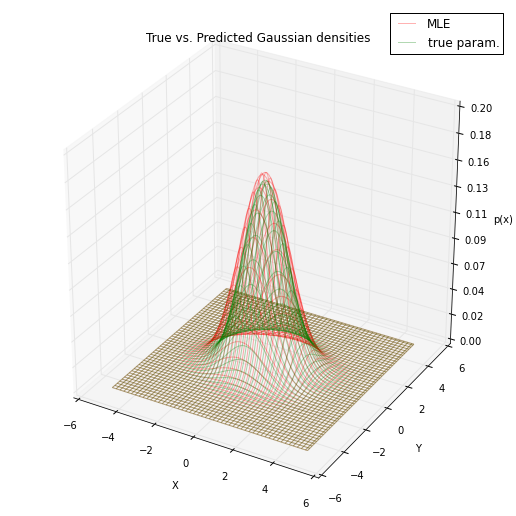

In [22]:
# Plot Probability Density Function
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(9, 9))
ax = fig.gca(projection='3d')

X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X,Y = np.meshgrid(X,Y)

Z_mle = []
for i,j in zip(X.ravel(),Y.ravel()):
    Z_mle.append(pdf_multivariate_gauss(np.array([[i],[j]]), mu_mle, cov_mle))
Z_mle = np.asarray(Z_mle).reshape(len(Z_mle)**0.5, len(Z_mle)**0.5)   
surf = ax.plot_wireframe(X, Y, Z_mle, color='red', rstride=2, cstride=2, alpha=0.3, label='MLE')

Z_true = []
for i,j in zip(X.ravel(),Y.ravel()):
    Z_true.append(pdf_multivariate_gauss(np.array([[i],[j]]), mu_vec, cov_mat))
Z_true = np.asarray(Z_true).reshape(len(Z_true)**0.5, len(Z_true)**0.5)
surf = ax.plot_wireframe(X, Y, Z_true, color='green', rstride=2, cstride=2, alpha=0.3, label='true param.')

ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(plt.LinearLocator(10))
ax.zaxis.set_major_formatter(plt.FormatStrFormatter('%.02f'))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('p(x)')
ax.legend()

plt.title('True vs. Predicted Gaussian densities')

plt.show()

<a name='uni_rayleigh'></a>
<br>
<br>


# Univariate Rayleigh Distribution

### Probability Density Function

$p(x|\theta) =  \Bigg\{ \begin{array}{c}
  2\theta xe^{- \theta x^2},\quad \quad x \geq0, \\
  0,\quad otherwise. \\
  \end{array}$


<hr>

#### Derive a formula for the maximum likelihood estimate of $\theta$ , i.e., $\hat{{\theta}}_{mle}$.

$p(D|\theta) = \prod_{k=1}^{n} p(x_k|\theta) $


$= \prod_{k=1}^{n}  2 \theta x_ke^{- \theta x_{k}^{2}}  $

#### Taking the natural logarithm to get the log-likelihood:

$\Rightarrow L(\theta) = \sum_{k=1}^{n} ln \; p(x_k|\theta)$


$= \sum_{k=1}^{n} ln \bigg( 2 \theta x_ke^{- \theta x_{k}^{2}} \bigg) \\ 
= \sum_{k=1}^{n} ln (2 \theta x_k) - ( \theta x_{k}^{2})$
<br>


#### Differentiating the log-likelihood:


$\Rightarrow \frac{\partial L}{\partial (\theta)} = \frac{\partial}{\partial (\theta)} \sum_{k=1}^{n} ln (2 \theta x_k) - ( \theta x_{k}^{2})$



$= \sum_{k=1}^{n}  \frac{\partial}{\partial (\theta)}ln (2 \theta x_k) - ( \theta x_{k}^{2})\\
= \sum_{k=1}^{n}  \frac{2x_k}{2\theta x_k} - x_{k}^{2} \\
= \sum_{k=1}^{n} \frac{1}{\theta} - x_{k}^{2}$

#### Getting the maximum for $p(D|\theta)$

$\Rightarrow \sum_{k=1}^{n} \frac{1}{\theta} - x_{k}^{2} = 0 \\
\sum_{k=1}^{n} \frac{1}{\theta} = \sum_{k=1}^{n} x_{k}^{2}$

$\frac{n}{\theta} = \sum_{k=1}^{n} x_{k}^{2} \\
\frac{\theta}{n} = \frac{1}{\sum_{k=1}^{n} x_{k}^{2}} \\
\theta = \frac{n}{\sum_{k=1}^{n} x_{k}^{2}}$

<br>
<br>
### Code for univariate Rayleigh MLE

In [2]:
# loading packages

import numpy as np
from matplotlib import pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def comp_theta_mle(d):
    """
    Computes the Maximum Likelihood Estimate for a given 1D training
    dataset for a Rayleigh distribution.
    
    """
    theta = len(d) / sum([x**2  for x in d])
    return theta    

In [4]:
def likelihood_ray(x, theta):
    """
    Computes the class-conditional probability for an univariate
    Rayleigh distribution
    
    """
    return 2*theta*x*np.exp(-theta*(x**2))

In [8]:
training_data = [12, 17, 20, 24, 25, 30, 32, 50]

theta = comp_theta_mle(training_data)

print("Theta MLE:", theta)

Theta MLE: 0.00123877361412


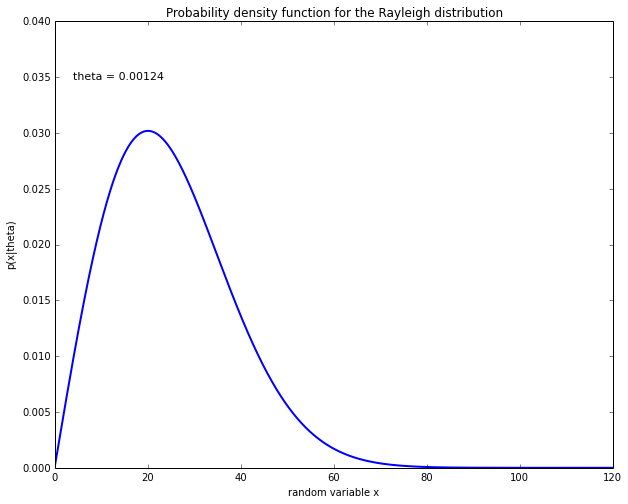

In [11]:
# Plot Probability Density Function
from matplotlib import pyplot as plt

x_range = np.arange(0, 150, 0.1)
y_range = [likelihood_ray(x, theta) for x in x_range]

plt.figure(figsize=(10,8))
plt.plot(x_range, y_range, lw=2)
plt.title('Probability density function for the Rayleigh distribution')
plt.ylabel('p(x|theta)')

ftext = 'theta = {:.5f}'.format(theta)
plt.figtext(.15,.8, ftext, fontsize=11, ha='left')


plt.ylim([0,0.04])
plt.xlim([0,120])
plt.xlabel('random variable x')

plt.show()

<a name='uni_poisson'></a>
<br>
<br>

# Univariate Poisson Distribution

### Probability Density Function

$p(x|\theta) = \frac{e^{-\theta}\theta^{xk}}{x_k!}$

<hr>

#### Derive a formula for the maximum likelihood estimate of $\theta$ , i.e., $\hat{{\theta}}_{mle}$.

$p(D|\theta) = \prod_{k=1}^{n} p(x_k|\theta)$


$= \prod_{k=1}^{n}
\frac{e^{-\theta}\theta^{xk}}{x_k!}$

#### Taking the natural logarithm to get the log-likelihood:

$p(D|\theta) = L(\theta) = \prod_{k=1}^{n} p(x_k|\theta)$


$= \sum_{k=1}^{n} ln \bigg( \frac{e^{-\theta}\theta^{xk}}{x_k!} \bigg)$

$= \sum_{k=1}^{n} ln(e^{-\theta}\theta^{xk}) - ln({x_k!})$ (simplify by removing the scalar, which becomes 0 in the derivative)

$= \sum_{k=1}^{n} ln(e^{-\theta}\theta^{xk})$

$= \sum_{k=1}^{n} ln(e^{-\theta}) + ln(\theta^{xk})$

$= \sum_{k=1}^{n} -\theta + x_k \; ln(\theta)$

#### Differentiating the log-likelihood:

$\frac{\partial \; L(\theta)}{\partial \; \theta} = \frac{\partial \; }{\partial \; \theta} \bigg( \sum_{k=1}^{n} -\theta + x_k \; ln(\theta)\bigg)$

$= \sum_{k=1}^{n} \frac{\partial \; }{\partial \; \theta} \bigg(  -\theta + x_k \; ln(\theta)\bigg)$

$= \sum_{k=1}^{n} \bigg( -1 + \frac{x_k}{\theta} \bigg)$

#### Getting the maximum for $p(D|\theta)$

$\Rightarrow -n +  \sum_{k=1}^{n} x_k \; \cdot \frac{1}{\theta} = 0$

$\theta = \frac{\sum_{k=1}^{n} x_k }{n}$

<br>
<br>
### Code for univariate Poisson MLE

In [36]:
def poisson_theta_mle(d):
    """
    Computes the Maximum Likelihood Estimate for a given 1D training
    dataset from a Poisson distribution.
    
    """
    return sum(d) / len(d)

In [46]:
import math

def likelihood_poisson(x, lam):
    """
    Computes the class-conditional probability for an univariate
    Poisson distribution
    
    """
    if x // 1 != x:
        likelihood = 0
    else:
        likelihood = math.e**(-lam) * lam**(x) / math.factorial(x)
    return likelihood

In [37]:
# Drawing training data

import numpy as np

true_param = 1.0
poisson_data = np.random.poisson(lam=true_param, size=100)

In [40]:
mle_poiss = poisson_theta_mle(poisson_data)

print('MLE:', mle_poiss)

MLE: 1.05


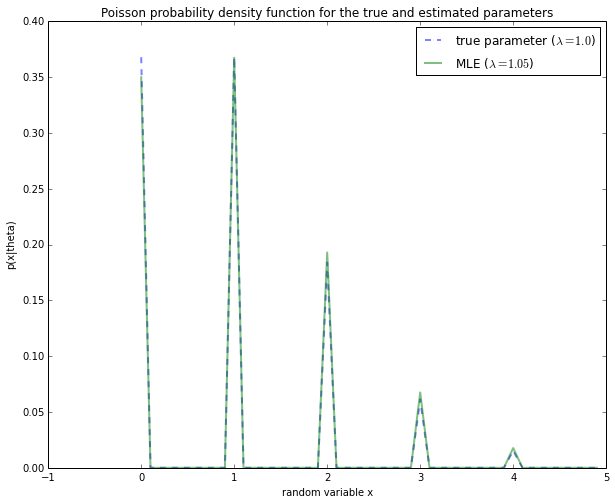

In [60]:
# Plot Probability Density Function
from matplotlib import pyplot as plt
    
x_range = np.arange(0, 5, 0.1)
y_true = [likelihood_poisson(x, true_param) for x in x_range]
y_mle = [likelihood_poisson(x, mle_poiss) for x in x_range]

plt.figure(figsize=(10,8))
plt.plot(x_range, y_true, lw=2, alpha=0.5, linestyle='--', label='true parameter ($\lambda={}$)'.format(true_param))
plt.plot(x_range, y_mle, lw=2, alpha=0.5, label='MLE ($\lambda={}$)'.format(mle_poiss))
plt.title('Poisson probability density function for the true and estimated parameters')
plt.ylabel('p(x|theta)')
plt.xlim([-1,5])
plt.xlabel('random variable x')
plt.legend()

plt.show()